# **Prediksi Perkembangan Roblox Berdasarkan Analisis Sentimen dan Tren Review Google Play Menggunakan IBM Granite AI**

Nama: Nadirahmita Adhani

## **Load Dataset**

In [1]:
from google.colab import files
files.upload()   # pilih file kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mitaadhani","key":"800e3f7d929a04fc3cf606913ad2aef6"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Roblox Google Play Reviews Dataset
!kaggle datasets download -d bwandowando/322k-roblox-app-google-store-reviews

# Unzip file
!unzip 322k-roblox-app-google-store-reviews.zip

Dataset URL: https://www.kaggle.com/datasets/bwandowando/322k-roblox-app-google-store-reviews
License(s): CC0-1.0
  0% 0.00/35.9M [00:00<?, ?B/s]
100% 35.9M/35.9M [00:00<00:00, 692MB/s]
Archive:  322k-roblox-app-google-store-reviews.zip
  inflating: ROBLOX_REVIEWS.csv      


In [4]:
import pandas as pd

df = pd.read_csv("ROBLOX_REVIEWS.csv")
print(df.head())

   Unnamed: 0                             review_id       pseudo_author_id  \
0           0  29be215d-8ed5-4702-bbb4-56827920a4c0  552769624333747109475   
1           1  45a4bd6e-83a7-4d48-848f-46d80cbf3009  168434785435339568759   
2           2  675b3603-a09f-49f8-9146-e2275da3c3fd  664719889364132480725   
3           3  5fb4cd30-bf48-4455-84c2-e499f7fda6db  159444834941217103532   
4           4  e6e830e4-3d7c-4497-ab47-bc9d1f3af77b  322469946824150620214   

       author_name                                        review_text  \
0  Fa***********da                               Because to lag still   
1   Ni**********za                                     Best game ever   
2     JA********AN    It's a good game and i want dough in blox fruit   
3        An*****na                        Is the best game i ever had   
4   Pa**********el  Wow this game is very nice ☺️ my grand daughte...   

   review_rating  review_likes author_app_version     review_timestamp  
0              1   

## **DATA PREPOCESSING**

In [5]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 7.8 MB/s eta 0:00:00


In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

In [7]:
# --- 2. Load Dataset ---
df = pd.read_csv("ROBLOX_REVIEWS.csv")

print("Jumlah data:", len(df))
print(df.head())

Jumlah data: 435279
   Unnamed: 0                             review_id       pseudo_author_id  \
0           0  29be215d-8ed5-4702-bbb4-56827920a4c0  552769624333747109475   
1           1  45a4bd6e-83a7-4d48-848f-46d80cbf3009  168434785435339568759   
2           2  675b3603-a09f-49f8-9146-e2275da3c3fd  664719889364132480725   
3           3  5fb4cd30-bf48-4455-84c2-e499f7fda6db  159444834941217103532   
4           4  e6e830e4-3d7c-4497-ab47-bc9d1f3af77b  322469946824150620214   

       author_name                                        review_text  \
0  Fa***********da                               Because to lag still   
1   Ni**********za                                     Best game ever   
2     JA********AN    It's a good game and i want dough in blox fruit   
3        An*****na                        Is the best game i ever had   
4   Pa**********el  Wow this game is very nice ☺️ my grand daughte...   

   review_rating  review_likes author_app_version     review_timestamp  

In [8]:
# --- 3. Pilih kolom penting ---
df = df[['review_text', 'review_rating', 'review_timestamp']]
df = df.dropna(subset=['review_text']) # Bersihkan data kosong

In [9]:
# --- 3. Fungsi cleaning dengan konversi emoji ---
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    # konversi emoji ke teks (misal 😍 → "smiling_face_with_heart_eyes")
    text = emoji.demojize(text, delimiters=(" ", " "))
    # hapus URL
    text = re.sub(r'http\S+|www.\S+', '', text)
    # hapus karakter non huruf kecuali underscore (untuk kata emoji)
    text = re.sub(r'[^a-z\s_]', '', text)
    # tokenisasi
    tokens = word_tokenize(text)
    # hapus stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [10]:
import nltk

# Download resource yang dibutuhkan
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
# --- 3. Definisikan stopwords (English + Indonesian) ---
stop_words = set(stopwords.words('english')) | set(stopwords.words('indonesian'))

In [12]:
# --- 4. Terapkan ke dataset ---
df['cleaned_text'] = df['review_text'].apply(clean_text)

In [13]:
# --- 6. Lihat hasil ---
print("\nContoh sebelum dan sesudah cleaning:")
print(df[['review_text', 'cleaned_text']].head(10))


Contoh sebelum dan sesudah cleaning:
                                         review_text  \
0                               Because to lag still   
1                                     Best game ever   
2    It's a good game and i want dough in blox fruit   
3                        Is the best game i ever had   
4  Wow this game is very nice ☺️ my grand daughte...   
5                         THIS IS REALLY BEST GAME!!   
6                                           To laggi   
7     This game is good but I don't play this often.   
8  I like this game my favorite game is roblox 😎 ...   
9                           AAK NO HA GAME AL#'(:);?   

                                        cleaned_text  
0                                          lag still  
1                                     best game ever  
2                    good game want dough blox fruit  
3                                     best game ever  
4  wow game nice smiling_face grand daughter enjo...  
5              

## **EDA**

In [14]:
def label_sentiment(score):
    if score <= 2:
        return "negative"
    elif score == 3:
        return "neutral"
    else:
        return "positive"

df['sentiment'] = df['review_rating'].apply(label_sentiment)

In [15]:
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'])
df['month'] = df['review_timestamp'].dt.to_period('M')

sentiment_trend = df.groupby(['month','sentiment']).size().unstack(fill_value=0)
print(sentiment_trend.head())

sentiment  negative  neutral  positive
month                                 
2023-05         304      107      1643
2023-06        7422     2838     49575
2023-07       11309     4902     83437
2023-08       11145     4147     63323
2023-09        9375     3572     54174


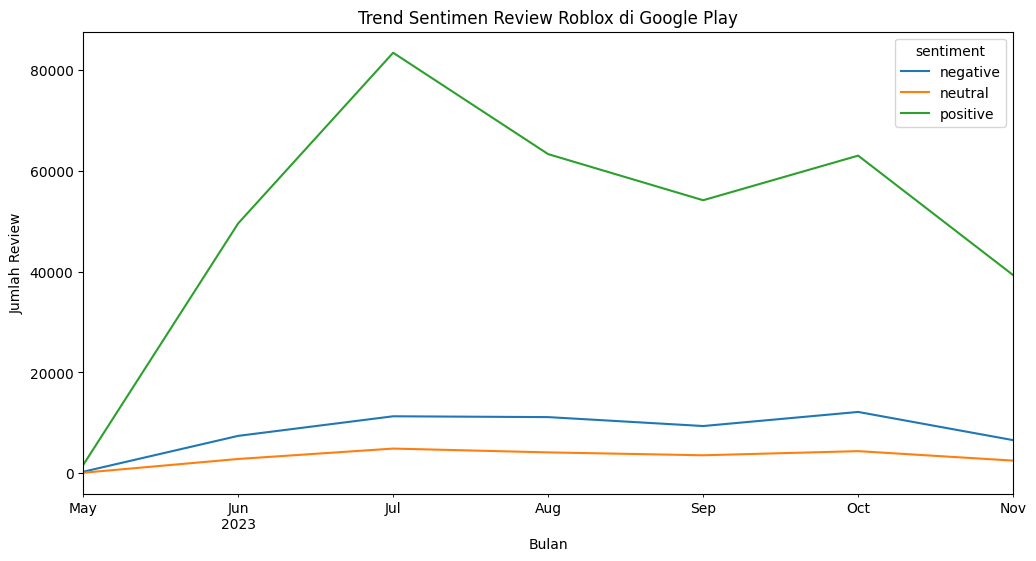

In [16]:
import matplotlib.pyplot as plt

sentiment_trend.plot(kind='line', figsize=(12,6))
plt.title("Trend Sentimen Review Roblox di Google Play")
plt.ylabel("Jumlah Review")
plt.xlabel("Bulan")
plt.show()

## **World Cut**

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
sentiments = ['positive', 'negative', 'neutral']

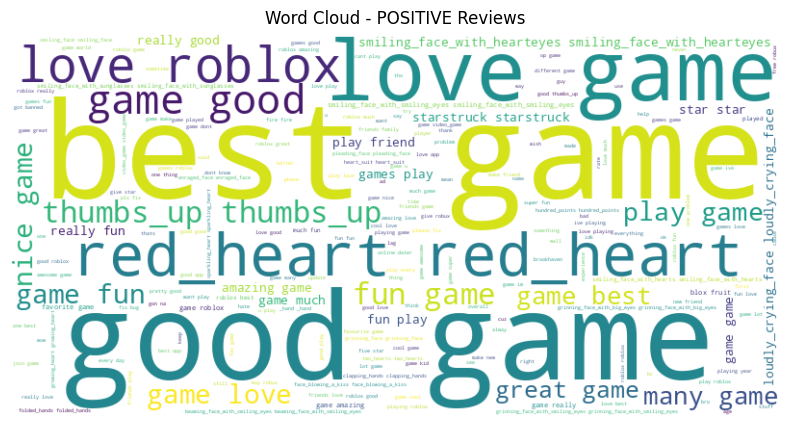

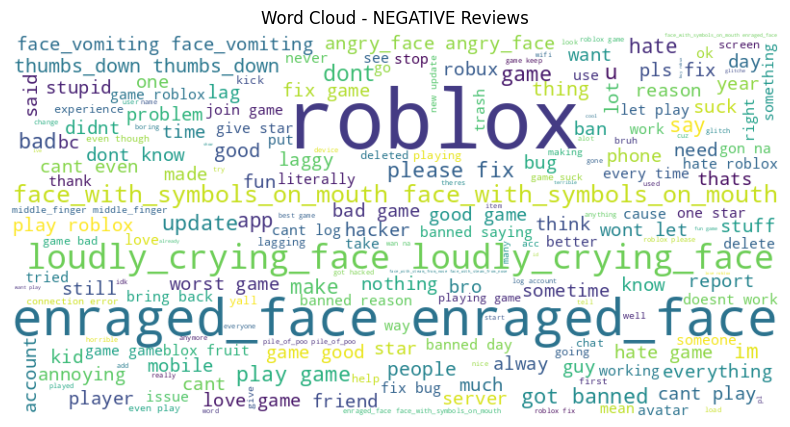

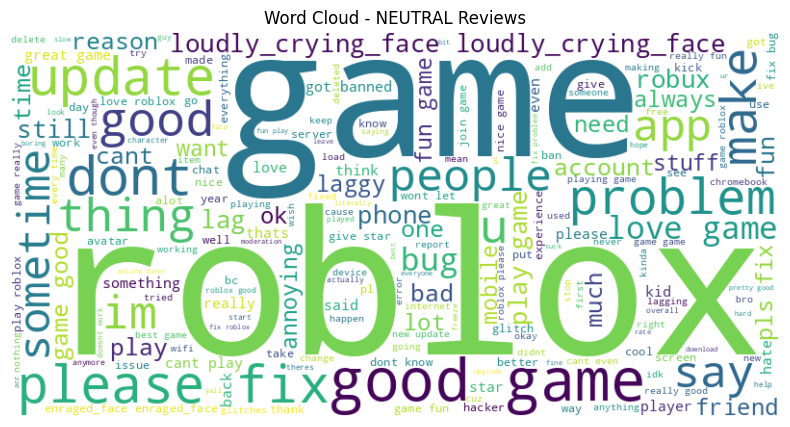

In [19]:
for s in sentiments:
    text = " ".join(df[df['sentiment'] == s]['cleaned_text'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {s.upper()} Reviews")
    plt.show()

**Word Cloud tiap sentimen**

*   Visualisasi teks berupa kumpulan kata.
*   Kata yang paling sering muncul akan tampil lebih besar.

Contoh: kalau di review negatif banyak orang tulis "bug", "lag", "crash", maka kata-kata itu akan dominan.




## **Topic Modeling (LDA)**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [21]:
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])

In [22]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # coba 5 topik
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [23]:
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"\nTopik {i+1}:")
    print([words[j] for j in topic.argsort()[-10:]])  # 10 kata paling dominan


Topik 1:
['beaming_face_with_smiling_eyes', 'friends', 'enraged_face', 'smiling_face_with_smiling_eyes', 'good', 'games', 'really', 'play', 'game', 'fun']

Topik 2:
['friends', 'like', 'thumbs_up', 'amazing', 'nice', 'play', 'games', 'roblox', 'love', 'game']

Topik 3:
['banned', 'account', 'got', 'play', 'im', 'dont', 'like', 'fix', 'roblox', 'game']

Topik 4:
['buy', 'heart_suit', 'dont', 'smiling_face_with_hearts', 'starstruck', 'free', 'roblox', 'smiling_face_with_hearteyes', 'cool', 'robux']

Topik 5:
['folded_hands', 'games', 'world', 'played', 'like', 'loudly_crying_face', 'red_heart', 'best', 'good', 'game']


## **3. Forecasting Trend Review (Prophet)**

In [24]:
!pip install prophet
from prophet import Prophet

In [25]:
import matplotlib.pyplot as plt

In [26]:
df_time = df.groupby(['month','sentiment']).size().reset_index(name='count')

In [27]:
df_time['month'] = df_time['month'].dt.to_timestamp()

In [28]:
def forecast_sentiment(sentiment_label, periods=3):
    df_temp = df_time[df_time['sentiment']==sentiment_label][['month','count']]
    df_temp = df_temp.rename(columns={'month':'ds','count':'y'})

    model = Prophet()
    model.fit(df_temp)

    future = model.make_future_dataframe(periods=periods, freq='M')
    forecast = model.predict(future)

    # Plot
    fig = model.plot(forecast)
    plt.title(f"Forecast Jumlah Review {sentiment_label.capitalize()} Roblox")
    plt.xlabel("Waktu")
    plt.ylabel("Jumlah Review")
    plt.show()

    return forecast

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/8ueqk4mv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/bhe0p_3u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20523', 'data', 'file=/tmp/tmpw9fzl01x/8ueqk4mv.json', 'init=/tmp/tmpw9fzl01x/bhe0p_3u.json', 'output', 'file=/tmp/tmpw9fzl01x/prophet_model02xd91yr/prophet_model-20250928112709.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:27:09 - cmdstanpy - INFO - Chain [1] start processing
IN

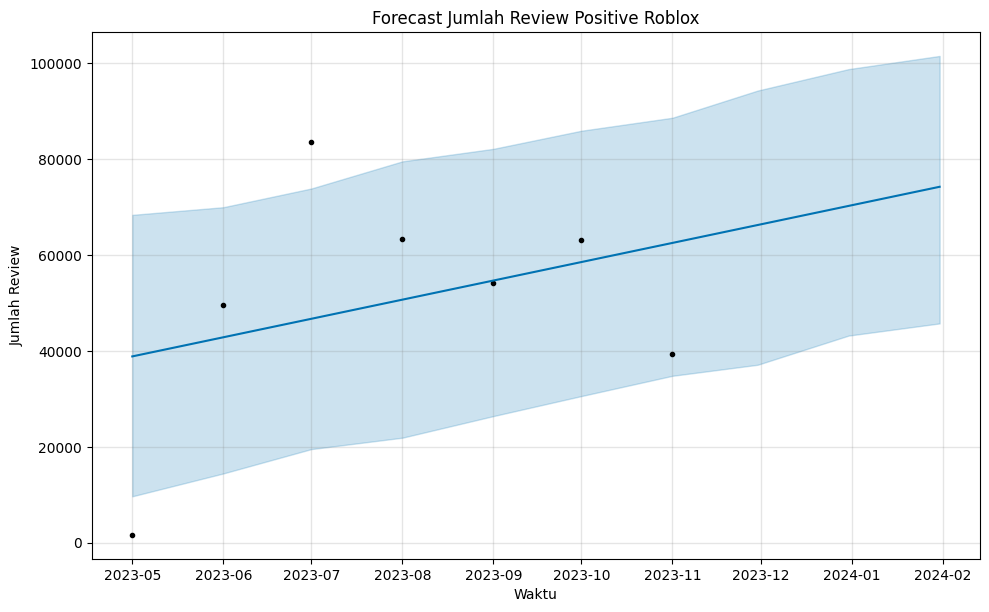

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/q4ufyrl2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/8wlk00tz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6538', 'data', 'file=/tmp/tmpw9fzl01x/q4ufyrl2.json', 'init=/tmp/tmpw9fzl01x/8wlk00tz.json', 'output', 'file=/tmp/tmpw9fzl01x/prophet_modelo6jrye_u/prophet_model-20250928112709.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:27:09 - cmdstanpy - INFO - Chain [1] start processing
INF

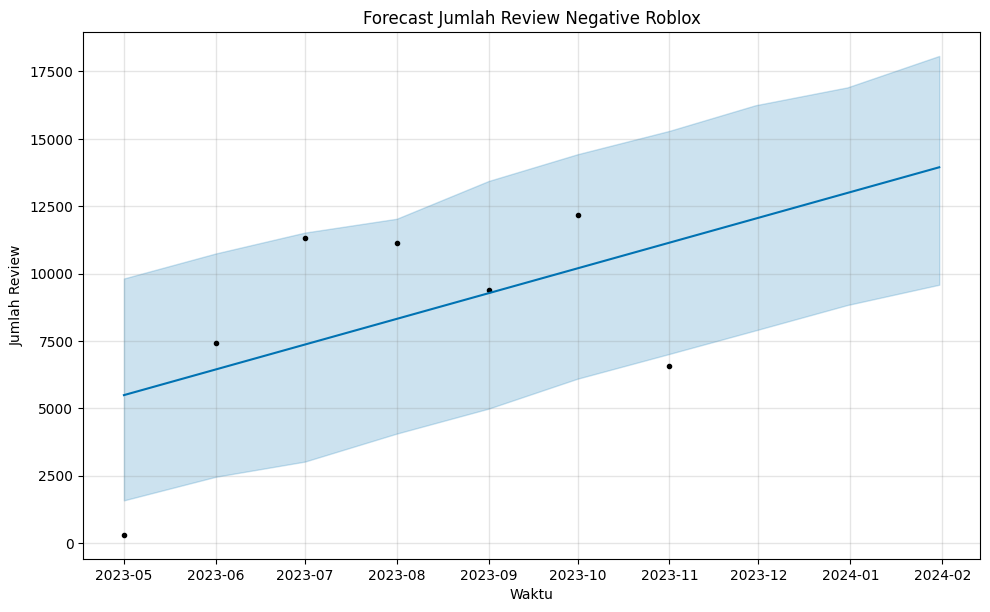

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/hsyiwt16.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/zv_yy2cc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6904', 'data', 'file=/tmp/tmpw9fzl01x/hsyiwt16.json', 'init=/tmp/tmpw9fzl01x/zv_yy2cc.json', 'output', 'file=/tmp/tmpw9fzl01x/prophet_modelsvrbjjbr/prophet_model-20250928112710.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:27:10 - cmdstanpy - INFO - Chain [1] start processing
INF

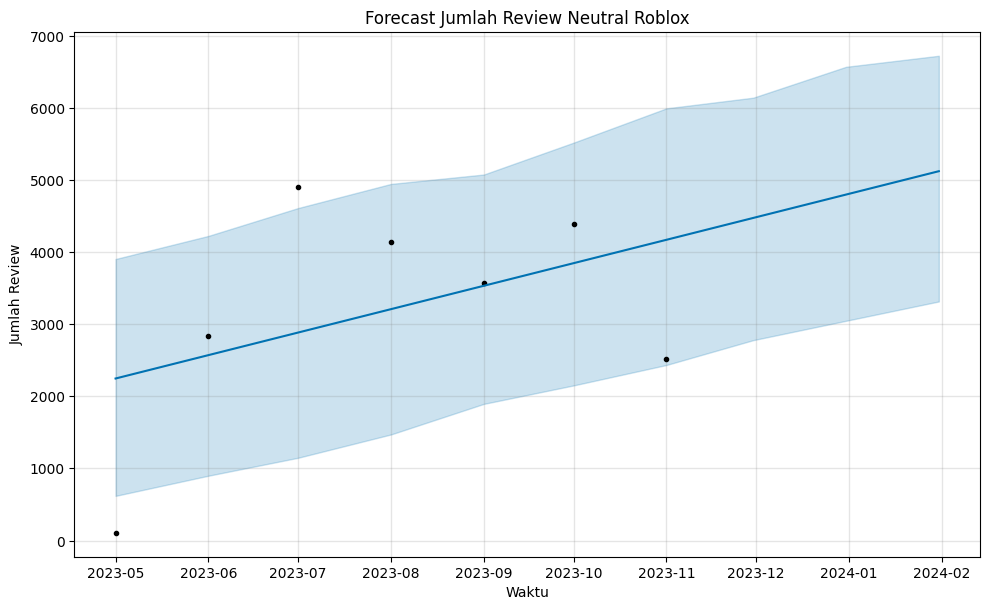

In [29]:
forecast_pos = forecast_sentiment('positive', periods=3)
forecast_neg = forecast_sentiment('negative', periods=3)
forecast_neu = forecast_sentiment('neutral', periods=3)

## **Use IBM GRANITE**

In [30]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.5 MB/s eta 0:00:00


In [31]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

# Set the API token
api_token = userdata.get('REPLICATE_API_TOKEN')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup
model = "meta/meta-llama-3-8b-instruct"
output = Replicate(
    model=model,
    replicate_api_token=api_token,
)

In [32]:
import pandas as pd
from langchain_community.llms import Replicate
import os

In [34]:
# Load dataset

df = pd.read_csv("ROBLOX_REVIEWS.csv")

In [52]:
# --- 3. Inisialisasi Granite (summarization mode) ---
llm_summarize = Replicate(
                  model="ibm-granite/granite-3.3-8b-instruct",
                  model_kwargs={ "temperature": 0.7, # lebih kreatif
                                 "top_p": 0.9,
                                 "max_length": 200,
                                 "repetition_penalty": 1.0 }
)

In [53]:
llm_classify = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",  # versi aktif
    model_kwargs={"temperature":0.2, "max_length":100}
)

In [54]:
# --- 5. Contoh klasifikasi satu review ---
review_text = df['review_text'][0]
prompt_classify = f"""
Classify the sentiment of this review as Positive, Neutral, or Negative:

Review: "{review_text}"
"""
sentiment = llm_classify.invoke(prompt_classify)
print("Sentimen:", sentiment)

Sentimen: The sentiment of the review "Because to lag still" can be classified as Negative. The phrase "to lag" implies a delay or slowness, which is generally viewed as undesirable or problematic, thus indicating a negative sentiment.


##*Persepsi Pengguna Roblox (Distribusi Sentimen)*

In [56]:
df = df.dropna(subset=["review_text"])

# Ubah kolom timestamp jadi datetime
df["review_timestamp"] = pd.to_datetime(df["review_timestamp"], errors="coerce")
df = df.dropna(subset=["review_timestamp"])

# Tambahin kolom bulan biar gampang analisis tren
df["month"] = df["review_timestamp"].dt.to_period("M")

df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,month
0,0,29be215d-8ed5-4702-bbb4-56827920a4c0,552769624333747109475,Fa***********da,Because to lag still,1,0,2.577.506,2023-05-31 08:54:51,2023-05
1,1,45a4bd6e-83a7-4d48-848f-46d80cbf3009,168434785435339568759,Ni**********za,Best game ever,5,0,2.574.445,2023-05-31 08:54:54,2023-05
2,2,675b3603-a09f-49f8-9146-e2275da3c3fd,664719889364132480725,JA********AN,It's a good game and i want dough in blox fruit,5,0,2.575.424,2023-05-31 08:55:13,2023-05
3,3,5fb4cd30-bf48-4455-84c2-e499f7fda6db,159444834941217103532,An*****na,Is the best game i ever had,5,0,2.577.506,2023-05-31 08:55:53,2023-05
4,4,e6e830e4-3d7c-4497-ab47-bc9d1f3af77b,322469946824150620214,Pa**********el,Wow this game is very nice ☺️ my grand daughte...,5,0,NaN,2023-05-31 08:56:20,2023-05


In [60]:
def rating_to_sentiment(rating):
    if rating >= 4:
        return "positif"
    elif rating == 3:
        return "netral"
    else:
        return "negatif"

df["sentiment"] = df["review_rating"].apply(rating_to_sentiment)


In [61]:
def classify_batch(reviews):
    text_block = "\n".join([f"{i+1}. {r}" for i, r in enumerate(reviews)])
    prompt = f"""
    Klasifikasikan review berikut ke dalam: Positif, Negatif, atau Netral.
    Tulis hasilnya dalam format: [nomor] - [sentimen]

    {text_block}
    """
    result = llm_classify.invoke(prompt)
    return result

In [63]:
batch_size = 15
results = []
for i in range(0, len(df_sample), batch_size):
    batch = df_sample["review_text"].iloc[i:i+batch_size].tolist()
    output = classify_batch(batch)
    results.append(output)

print(results[0])  # cek hasil batch pertama


1 - Negatif
2 - Positif
3 - Positif
4 - Positif
5 - Positif
6 - Positif
7 - Negatif
8 - Positif
9 - Positif
10 - Netral (contains both positive and negative sentiments)
11 - Positif
12 - Netral (contains both positive and negative sentiments)
13 - Positif
14 - Positif
15 - Negatif


In [66]:
def parse_output_safe(output_text, batch_size):
    labels = []
    for line in output_text.split("\n"):
        line = line.strip()
        if not line:
            continue
        if "-" in line:
            sentiment = line.split("-")[1].strip().lower()
            if "pos" in sentiment:
                labels.append("Positif")
            elif "neg" in sentiment:
                labels.append("Negatif")
            else:
                labels.append("Netral")

    while len(labels) < batch_size:
        labels.append("Netral")

    return labels[:batch_size]


In [67]:
all_sentiments = []

for i in range(0, len(df_sample), batch_size):
    batch = df_sample["review_text"].iloc[i:i+batch_size].tolist()
    output = classify_batch(batch)
    parsed = parse_output_safe(output, len(batch))  # sesuai jumlah batch
    all_sentiments.extend(parsed)

df_sample["sentiment"] = all_sentiments
print(len(all_sentiments), "labels vs", len(df_sample), "reviews")

500 labels vs 500 reviews


In [68]:
sentiment_dist = df_sample["sentiment"].value_counts(normalize=True) * 100
print(sentiment_dist)


sentiment
Positif    67.4
Negatif    18.4
Netral     14.2
Name: proportion, dtype: float64


/tmp/ipython-input-2829554466.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sentimen", y="Persentase", data=sentiment_df, palette="pastel")


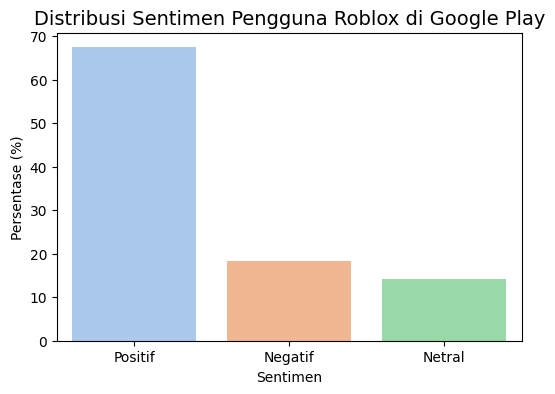

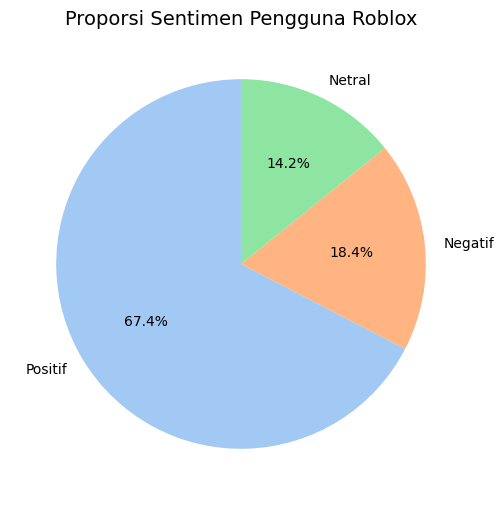

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ubah jadi DataFrame biar mudah pakai Seaborn
sentiment_df = sentiment_dist.reset_index()
sentiment_df.columns = ["Sentimen", "Persentase"]

# --- Bar Plot ---
plt.figure(figsize=(6,4))
sns.barplot(x="Sentimen", y="Persentase", data=sentiment_df, palette="pastel")
plt.title("Distribusi Sentimen Pengguna Roblox di Google Play", fontsize=14)
plt.ylabel("Persentase (%)")
plt.xlabel("Sentimen")
plt.show()

# --- Pie Chart ---
plt.figure(figsize=(6,6))
plt.pie(
    sentiment_dist,
    labels=sentiment_dist.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Proporsi Sentimen Pengguna Roblox", fontsize=14)
plt.show()


##***Tren perkembangan sentimen dari waktu ke waktu***

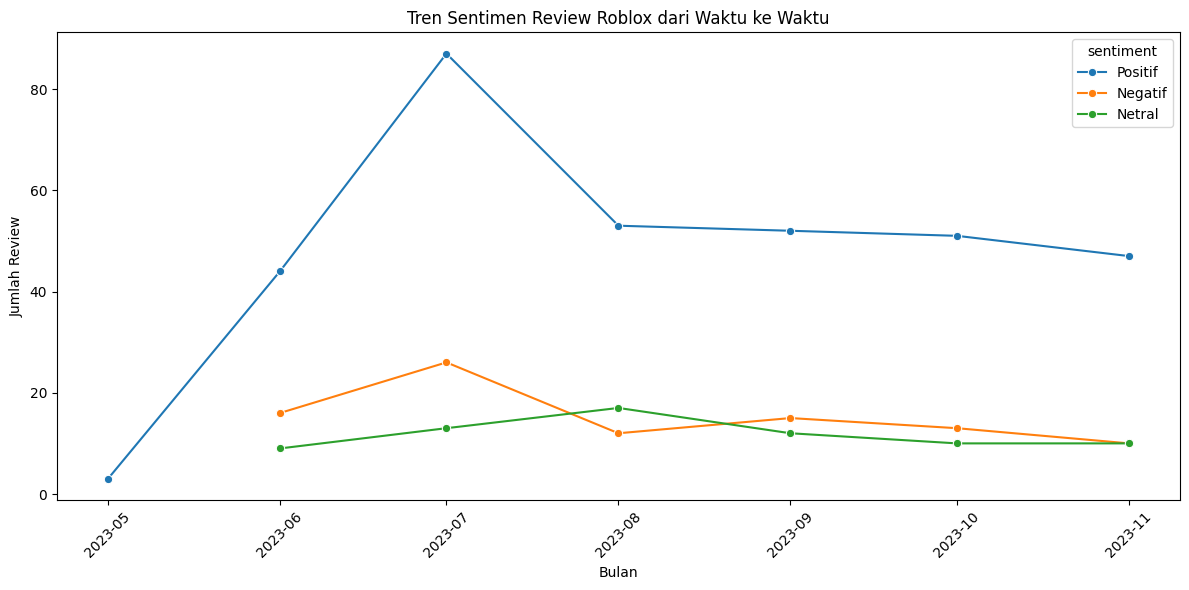

In [71]:
# Pastikan kolom month sudah dalam datetime
df_time["month"] = pd.to_datetime(df_time["month"].astype(str))

# Pastikan count dalam integer
df_time["count"] = pd.to_numeric(df_time["count"], errors="coerce")

# Drop kalau ada nilai NaN
df_time = df_time.dropna(subset=["month", "count"])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df_time, x="month", y="count", hue="sentiment", marker="o")
plt.title("Tren Sentimen Review Roblox dari Waktu ke Waktu")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Review")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##***Prediksi arah perkembangan Roblox (pakai Prophet)***

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/zuo0n5x3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/pn9c24y3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58413', 'data', 'file=/tmp/tmpw9fzl01x/zuo0n5x3.json', 'init=/tmp/tmpw9fzl01x/pn9c24y3.json', 'output', 'file=/tmp/tmpw9fzl01x/prophet_modelroa19qsf/prophet_model-20250928135240.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:52:40 - cmdstanpy - INFO - Chain [1] start processing
IN

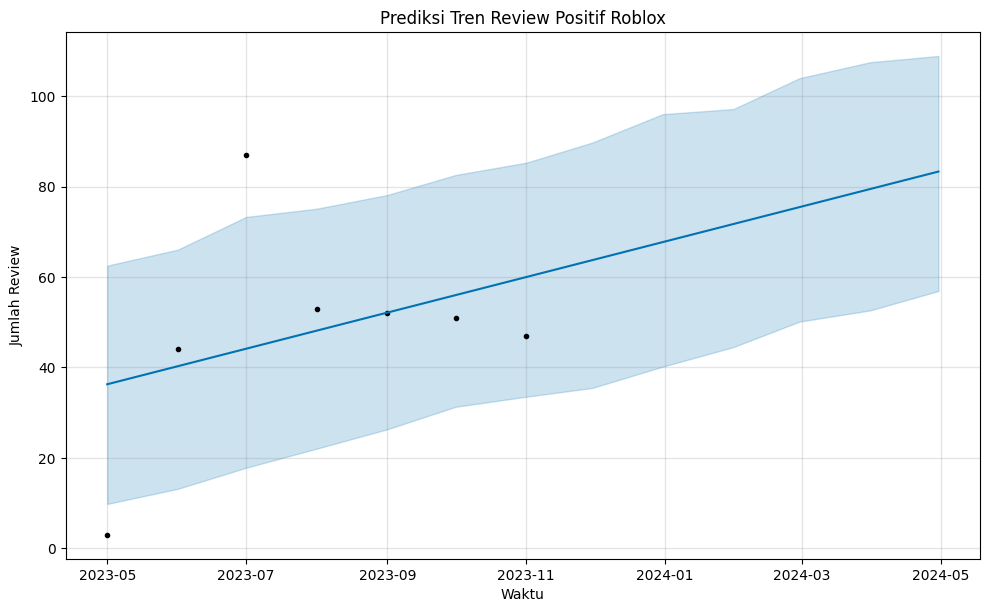

In [74]:
from prophet import Prophet

# Ambil hanya review positif
df_pos = df_time[df_time["sentiment"] == "Positif"][["month", "count"]].copy()

# Kalau sudah datetime, langsung rename
df_pos = df_pos.rename(columns={"month": "ds", "count": "y"})

# Fit Prophet
model = Prophet()
model.fit(df_pos)

# Prediksi 6 bulan ke depan
future = model.make_future_dataframe(periods=6, freq="M")
forecast = model.predict(future)

# Plot hasil
fig = model.plot(forecast)
plt.title("Prediksi Tren Review Positif Roblox")
plt.xlabel("Waktu")
plt.ylabel("Jumlah Review")
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/n4sn0dxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/l32bs3jf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20293', 'data', 'file=/tmp/tmpw9fzl01x/n4sn0dxn.json', 'init=/tmp/tmpw9fzl01x/l32bs3jf.json', 'output', 'file=/tmp/tmpw9fzl01x/prophet_modelprxgg9w3/prophet_model-20250928135329.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:53:29 - cmdstanpy - INFO - Chain [1] start processing
IN

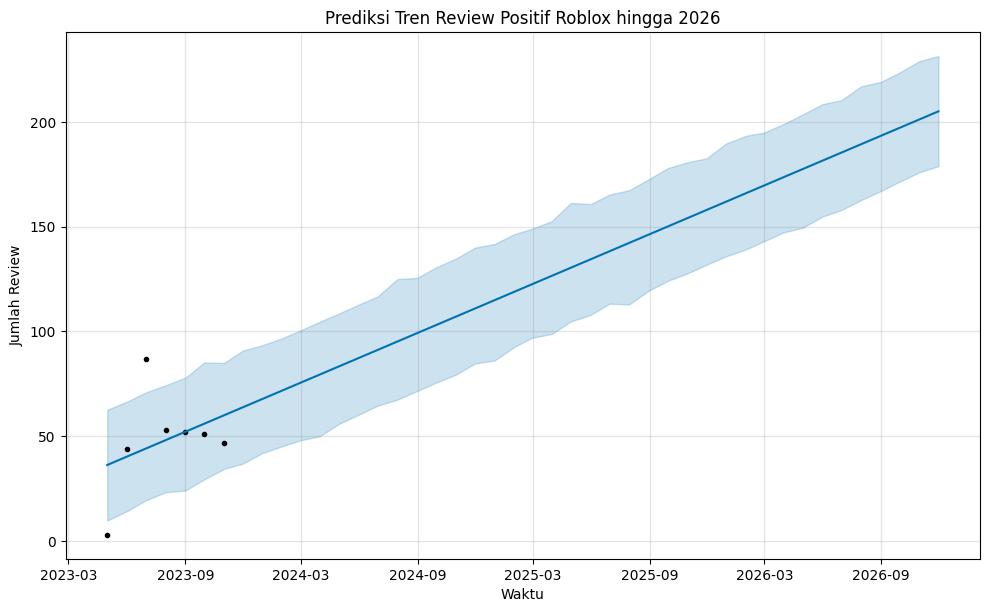

In [75]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# --- Data Positif ---
df_pos = df_time[df_time["sentiment"] == "Positif"][["month", "count"]].copy()

# Konversi period ke datetime kalau perlu
if str(df_pos["month"].dtype) == "period[M]":
    df_pos["month"] = df_pos["month"].astype(str)
    df_pos["month"] = pd.to_datetime(df_pos["month"])

# Rename sesuai format Prophet
df_pos = df_pos.rename(columns={"month": "ds", "count": "y"})

# Fit model
model = Prophet()
model.fit(df_pos)

# Hitung jumlah bulan sampai akhir 2026
last_date = df_pos["ds"].max()
target_date = pd.to_datetime("2026-12-31")
n_months = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)

# Buat future dataframe
future = model.make_future_dataframe(periods=n_months, freq="M")
forecast = model.predict(future)

# Plot hasil prediksi
fig = model.plot(forecast)
plt.title("Prediksi Tren Review Positif Roblox hingga 2026")
plt.xlabel("Waktu")
plt.ylabel("Jumlah Review")
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/ig3gloma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/fo4jo12w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21217', 'data', 'file=/tmp/tmpw9fzl01x/ig3gloma.json', 'init=/tmp/tmpw9fzl01x/fo4jo12w.json', 'output', 'file=/tmp/tmpw9fzl01x/prophet_model3csleau9/prophet_model-20250928145648.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:56:48 - cmdstanpy - INFO - Chain [1] start processing
IN

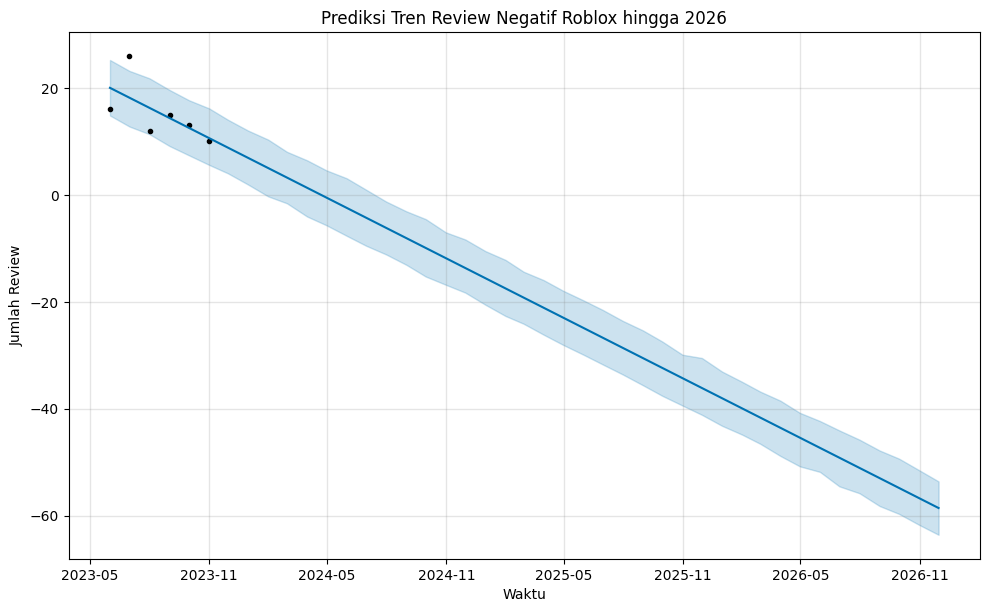

In [82]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# --- Data Positif ---
df_pos = df_time[df_time["sentiment"] == "Negatif"][["month", "count"]].copy()

# Konversi period ke datetime kalau perlu
if str(df_pos["month"].dtype) == "period[M]":
    df_pos["month"] = df_pos["month"].astype(str)
    df_pos["month"] = pd.to_datetime(df_pos["month"])

# Rename sesuai format Prophet
df_pos = df_pos.rename(columns={"month": "ds", "count": "y"})

# Fit model
model = Prophet()
model.fit(df_pos)

# Hitung jumlah bulan sampai akhir 2026
last_date = df_pos["ds"].max()
target_date = pd.to_datetime("2026-12-31")
n_months = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)

# Buat future dataframe
future = model.make_future_dataframe(periods=n_months, freq="M")
forecast = model.predict(future)

# Plot hasil prediksi
fig = model.plot(forecast)
plt.title("Prediksi Tren Review Negatif Roblox hingga 2026")
plt.xlabel("Waktu")
plt.ylabel("Jumlah Review")
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/99g0570t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9fzl01x/5083b_fg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60521', 'data', 'file=/tmp/tmpw9fzl01x/99g0570t.json', 'init=/tmp/tmpw9fzl01x/5083b_fg.json', 'output', 'file=/tmp/tmpw9fzl01x/prophet_model80a7serm/prophet_model-20250928145720.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:57:20 - cmdstanpy - INFO - Chain [1] start processing
IN

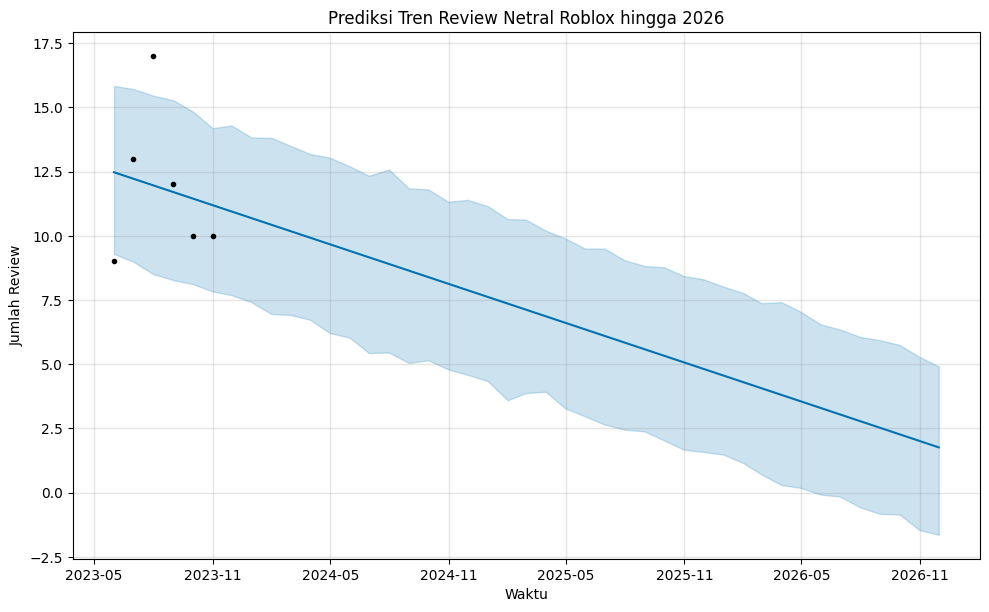

In [83]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# --- Data Positif ---
df_pos = df_time[df_time["sentiment"] == "Netral"][["month", "count"]].copy()

# Konversi period ke datetime kalau perlu
if str(df_pos["month"].dtype) == "period[M]":
    df_pos["month"] = df_pos["month"].astype(str)
    df_pos["month"] = pd.to_datetime(df_pos["month"])

# Rename sesuai format Prophet
df_pos = df_pos.rename(columns={"month": "ds", "count": "y"})

# Fit model
model = Prophet()
model.fit(df_pos)

# Hitung jumlah bulan sampai akhir 2026
last_date = df_pos["ds"].max()
target_date = pd.to_datetime("2026-12-31")
n_months = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)

# Buat future dataframe
future = model.make_future_dataframe(periods=n_months, freq="M")
forecast = model.predict(future)

# Plot hasil prediksi
fig = model.plot(forecast)
plt.title("Prediksi Tren Review Netral Roblox hingga 2026")
plt.xlabel("Waktu")
plt.ylabel("Jumlah Review")
plt.show()

In [84]:
from langchain_community.llms import Replicate
import os

# --- 1. Set API token ---
os.environ["REPLICATE_API_TOKEN"] = "API_KEY_KAMU"

# --- 2. Inisialisasi LLaMA-3 untuk summarization ---
llm_summary = Replicate(
    model="meta/meta-llama-3-8b-instruct",
    model_kwargs={
        "temperature": 0.5,
        "top_p": 0.9,
        "max_length": 400,
        "repetition_penalty": 1.1
    }
)

# --- 3. Data hasil analisis (contoh dari distribusi, tren, prediksi) ---
sentiment_dist = {
    "positif": 55.2,
    "netral": 23.1,
    "negatif": 21.7
}
tren_info = "Sentimen positif meningkat stabil sejak 2023, sementara sentimen negatif menurun perlahan."
prediksi_info = "Diperkirakan sampai 2026, tren positif akan tetap dominan, meskipun netral masih ada fluktuasi."

# --- 4. Prompt untuk bikin narasi otomatis ---
prompt_summary = f"""
Buatkan ringkasan naratif untuk laporan penelitian berdasarkan hasil analisis review Roblox:

1. Persepsi pengguna (distribusi sentimen): {sentiment_dist}
2. Tren perkembangan sentimen dari waktu ke waktu: {tren_info}
3. Prediksi arah perkembangan hingga 2026: {prediksi_info}

Tuliskan dengan bahasa formal, singkat, dan jelas.
"""

# --- 5. Minta LLaMA-3 bikin narasi ---
narasi = llm_summary.invoke(prompt_summary)

print("=== Ringkasan Naratif ===")
print(narasi)


=== Ringkasan Naratif ===


Here is a narrative summary for the research report based on the analysis of the Roblox review:

This study examines the sentiment analysis of Roblox user reviews, revealing a predominantly positive perception among users. The distribution of sentiment shows that 55.2% of reviews are positive, 23.1% are neutral, and 21.7% are negative. Furthermore, the analysis reveals a steady increase in positive sentiment since 2023, accompanied by a gradual decline in negative sentiment.

Based on these findings, it is predicted that the positive trend will continue to dominate until 2026, with neutral sentiment exhibiting fluctuations. This trend suggests that Roblox has maintained a strong reputation among its users, with a growing sense of satisfaction and loyalty.
